In [2]:
# Import libraries, dependencies
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt


In [3]:
# Open combined data csv as dataframe
denver_df = pd.read_csv("resources/combined_data.csv")
denver_df.head()

,Zip Code,Number of Facilities,Population,Per Capita Income,Median Age
0,80015,43,70215,41860,37.6
1,80218,42,18915,71825,34.9
2,80211,42,36061,59034,34.0
3,80016,37,58948,55122,38.5
4,80012,35,53862,26477,32.8


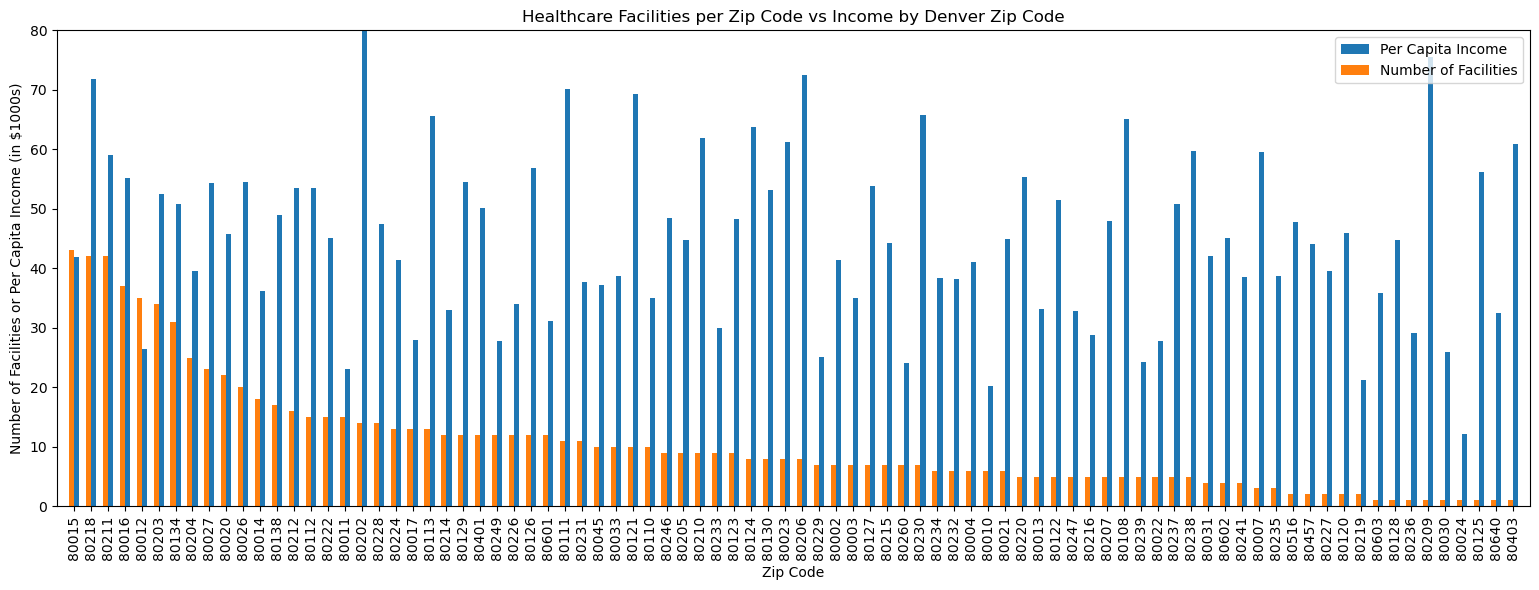

In [4]:
# Create  with income and # of healthcare facilities.
income_hcf_df = denver_df[["Number of Facilities", "Per Capita Income"]]
x = denver_df['Zip Code'].values
y1 = denver_df["Number of Facilities"].values
y2 = denver_df["Per Capita Income"].div(1000)
y2 = y2.values

# Plot dataframe in double bar chart. 
x_axis = np.arange(len(x))
width = .3
fig = plt.figure(figsize=(15.5, 6))
plt.bar(x_axis + width/2, y2, width = width, label = 'Per Capita Income')
plt.bar(x_axis - width/2, y1, width = width, label = "Number of Facilities" )
plt.axis([-1, len(x), 0, 80])
plt.xticks(x_axis, x, rotation=90)

# Give the chart titles & save image as .png
plt.xlabel('Zip Code')
plt.ylabel('Number of Facilities or Per Capita Income (in $1000s)')
plt.title("Healthcare Facilities per Zip Code vs Income by Denver Zip Code")
plt.legend()
plt.tight_layout()
plt.savefig("output_data/income_hcf_by_denver_zip.png")
plt.show()

The coefficient of determination is 0.033830478077854456


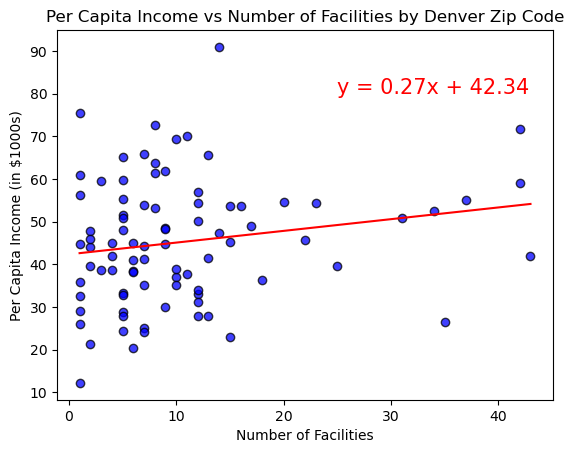

In [5]:
# TODO: scatter plot and lin reg of number of faciliies against per capita income
x = denver_df["Number of Facilities"].values
y1 = denver_df["Per Capita Income"].div(1000)
y2 = y1.values
(slope, intercept, rvalue, pvalue, stderror) = linregress(x, y2)
lr_values = x * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x,y2, facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x,lr_values,"r-")
plt.annotate(line_eq,(25, 80),fontsize=15,color="red")
plt.title("Per Capita Income vs Number of Facilities by Denver Zip Code")
plt.xlabel("Number of Facilities")
plt.ylabel("Per Capita Income (in $1000s)")

print(f"The coefficient of determination is {rvalue**2}")

# Save the figure
plt.savefig("output_data/income_scatter.png")
# Show scatter plot
plt.show()